# Домашнее задание. Титаник
В этом домашнем задании вам предлагается решить задачу предсказания выживших пассажиров Титаника. Эту задачу машинного обучения рано или поздно решает, наверное, любой, кто обучается анализу данных. Информация о датасете доступна по <a href=https://www.kaggle.com/c/titanic.>ссылке</a>.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Загрузка данных

Загрузим датасет Titanic из приложенных файлов. В первом файле находится информация о пассажирах, во втором -- информация о том, выжил пассажир или нет.

Если вы запускаете ноутбук на Google Colab, самым простым способом загрузить данные в ноутбук будет примонтировать к Colab ваш Google Drive. Для этого сначала положите в свою корневую директорию Google Drive  файлы, приложенные к этому ноутбуку, а затем выполните три закоментированные строчки в клетке ниже. <a href=https://www.machinelearningmastery.ru/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166/>Подробная инструкция по работе с Google Drive + Google Colab</a>

In [2]:
from google.colab import drive
drive.mount('/content/gdrive/')
data = pd.read_csv('/content/gdrive/My Drive/titanic_data.csv', index_col='PassengerId')

#Если запускаете ноутбук локально:
# data = pd.read_csv('titanic_data.csv', index_col='PassengerId')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
4/4AEeQudGaTXXEKJQGUS1YJpEfR3iJ7ZaImgAot992bfDK8x81u1u6hM
Mounted at /content/gdrive/


In [3]:
basic_features = data.columns
y = pd.read_csv('/content/gdrive/My Drive/titanic_surv.csv')
#y = pd.read_csv('titanic_surv.csv')
y.index = data.index

print(f'Всего {len(data)} пассажиров в выборке')
data.head()

Всего 891 пассажиров в выборке


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
y.head()

,Survived
PassengerId,
1,0
2,1
3,1
4,1
5,0


In [6]:
data = data.join(y)
data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
PassengerId,,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


## Исследование датасета

### Задание 1 (1 балл)
Опишите датасет. Сколько в нём мужчин, сколько женщин? Посчитайте распределение по классам пассажиров. Используйте функцию ``pd.Series.value_counts``. <a href=https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html>Пример использования</a>

Посчитайте долю выживших мужчин к общему количеству мужчин, а также женщин к общему количеству женщин. Сделайте выводы. 
Проведите схожую аналитику по возрасту выживших и по классу выживших. 

Вам поможет функция ``plt.hist()``. <a href=https://matplotlib.org/3.3.1/gallery/pyplots/pyplot_text.html#sphx-glr-gallery-pyplots-pyplot-text-py> Пример использования </a> 

In [7]:
data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [8]:
male = data['Sex'].value_counts()['male']
female = data['Sex'].value_counts()['female']

survived_male = len(data[(data['Sex'] == 'male') & (data['Survived'] == 1)])
survived_female = len(data[(data['Sex'] == 'female') & (data['Survived'] == 1)])


print(f"Доля выживших мужчин к общему количеству мужчин: {survived_male/male}")
print(f"Доля выживших женщин к общему количеству женщин: {survived_female/female}")

# Вывод - Доля выживших женщин к общему количеству женщин высока в отличие от выживших мужчин

Доля выживших мужчин к общему количеству мужчин: 0.18890814558058924
Доля выживших женщин к общему количеству женщин: 0.7420382165605095


(array([233.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 109.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

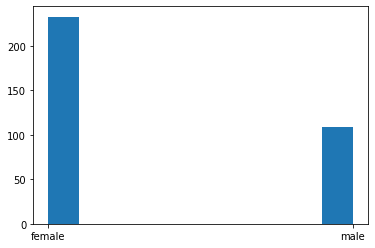

In [9]:
plt.hist(data[(data['Survived'] == 1)]['Sex'])

## Заполнение пропусков в данных
В данных имеются пропуски в трёх колонках: 

In [10]:
data.columns[data.isna().any()].tolist()

['Age', 'Cabin', 'Embarked']

Для простоты заполним все пропуски в категориальных колонках новым классом "0", а в числовой колонке Age --- медианным значением. 

In [11]:
data.loc[:, ['Cabin', 'Embarked']] = data.loc[:, ['Cabin', 'Embarked']].fillna('0')
data['Age'] = data['Age'].fillna(data['Age'].median())

## Подготовка плана тестирования

### Задание 2. (0 баллов)
Разделите выборку на обучающее и тестовое множество в соотношении 70:30.

In [12]:
from sklearn.model_selection import train_test_split
data_train, data_test = train_test_split(data, train_size=0.7)

## Выделение новых признаков
Теперь отложим тестовые данные и приступим к моделированию. Внимательно изучите данные. Можете ли вы выделить признаки, которые не указаны явно в таблице?

### Задание 3 (1 балл)
 Сформируйте по крайней мере один новый признак и объясните ваш выбор. Пример признака сформирован за вас. 

Указания: 
- Пассажиров можно поделить на несколько классов по их именам.
- Различных номеров кают слишком много. Но буквы в номерах кают указывают на их местоположение. (***Этот признак сформирован в примере***)
- Возможно, имеет смысл отделить мальчиков от мужчин. Отделять девочек от женщин может быть не так важно
- Другие идеи для признаков можно почерпнуть на форуме в обсуждении задачи на kaggle.com.

In [13]:
data

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
PassengerId,,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S,0
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S,1
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S,0
...,...,...,...,...,...,...,...,...,...,...,...
887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,0,S,0
888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,0,S,0


In [14]:
data['Cabin']

PassengerId
1         0
2       C85
3         0
4      C123
5         0
       ... 
887       0
888     B42
889       0
890    C148
891       0
Name: Cabin, Length: 891, dtype: object

In [15]:
def get_cabin_letter(row):
    return row['Cabin'][0]

data['Cabin'] = data.apply(get_cabin_letter, axis=1)

**Семья**

Посчитаем сумму членов семьи на борту из суммы братьев, сестёр и родителей, а также добавим дополнительный признак одиночества

Добавим группировку семьи на большую и маленькую

In [16]:
def family():
    return data.Parch + data.SibSp

data['Family'] = family()
data['IsAlone'] = data.Family == 0
data['SmallFamily'] = data['Family'].map(lambda s: 1 if 1 <= s <= 3 else 0)
data['BigFamily'] = data['Family'].map(lambda s: 1 if 4 <= s else 0)

**Имена**

Разобьём имена по обращениям

In [17]:
dataset_title = [i.split(",")[1].split(".")[0].strip() for i in data["Name"]]
data['Title']=data.Name.apply(lambda x: x.split('.')[0].split(',')[1].strip())
newtitles={
    "Capt":       "Officer",
    "Col":        "Officer",
    "Major":      "Officer",
    "Jonkheer":   "Royalty",
    "Don":        "Royalty",
    "Sir" :       "Royalty",
    "Dr":         "Officer",
    "Rev":        "Officer",
    "the Countess":"Royalty",
    "Dona":       "Royalty",
    "Mme":        "Mrs",
    "Mlle":       "Miss",
    "Ms":         "Mrs",
    "Mr" :        "Mr",
    "Mrs" :       "Mrs",
    "Miss" :      "Miss",
    "Master" :    "Master",
    "Lady" :      "Royalty"}

data['Title']=data.Title.map(newtitles)

data['Mother'] = (data['Title'] == 'Mrs') & (data['Parch'] > 0)
data['Mother'] = data['Mother'].astype(int)

**Билет**

Разобьём билеты на группы

In [18]:
data['Ticket_Lett'] = data['Ticket'].apply(lambda x: str(x)[0])
data['Ticket_Lett'] = data['Ticket_Lett'].apply(lambda x: str(x))
data['Ticket_Lett'] = np.where((data['Ticket_Lett']).isin(['1', '2', '3', 'S', 'P', 'C', 'A']), data['Ticket_Lett'],
                                   np.where((data['Ticket_Lett']).isin(['W', '4', '7', '6', 'L', '5', '8']),
                                            'Low_ticket', 'Other_ticket'))
data['Ticket_Len'] = data['Ticket'].apply(lambda x: len(x))

**Возраст**

Выделим возраст в **интервалы**

In [19]:
grp = data.groupby(['Sex', 'Pclass', 'Title'])
data.Age = grp.Age.apply(lambda x_: x_.fillna(x_.median()))
data.Age.fillna(data.Age.median, inplace=True)

data['AgeRange'] = pd.cut(data['Age'].astype(int), 5)

**Транспортные расходы**

Разобъём по категориям

In [20]:
data['FareCategory'] = pd.cut(data['Fare'], bins=[0, 7.90, 14.45, 31.28, 120], labels=['Low', 'Mid',
                                                                                                    'High_Mid', 'High'])


## Кодирование категориальных признаков и обработка данных
Все признаки сейчас делятся на числовые, бинарные, категориальные и текстовые. К текстовым признакам можно отнести имя пассажира, номер билета и номер каюты: значения этих признаков уникальны почти для всех пассажиров, и простого способа использовать их в модели не существует.

### Задание 4 (0 баллов)
Пока используя только изначальные признаки, перекодируйте категориальные признаки функцией ``pd.get_dummies``. Естественно, имена пассажиров и номера билетов и кают кодировать не стоит, поскольку все значения этих признаков уникальные. 

In [21]:
data

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Family,IsAlone,SmallFamily,BigFamily,Title,Mother,Ticket_Lett,Ticket_Len,AgeRange,FareCategory
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S,0,1,False,1,0,Mr,0,A,9,"(16.0, 32.0]",Low
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,1,1,False,1,0,Mrs,0,P,8,"(32.0, 48.0]",High
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S,1,0,True,0,0,Miss,0,S,16,"(16.0, 32.0]",Mid
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,1,1,False,1,0,Mrs,0,1,6,"(32.0, 48.0]",High
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S,0,0,True,0,0,Mr,0,3,6,"(32.0, 48.0]",Mid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,0,S,0,0,True,0,0,Officer,0,2,6,"(16.0, 32.0]",Mid
888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B,S,1,0,True,0,0,Miss,0,1,6,"(16.0, 32.0]",High_Mid
889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,0,S,0,3,False,1,0,Miss,0,Low_ticket,10,"(16.0, 32.0]",High_Mid


In [22]:
from sklearn.preprocessing import LabelEncoder
data = pd.concat([data,
                pd.get_dummies(data.Sex, prefix="Sex"),
                pd.get_dummies(data.Cabin, prefix="Cabin"),
                pd.get_dummies(data.Title, prefix="Title", drop_first = True),
                pd.get_dummies(data.AgeRange, prefix="AgeRange"),
                pd.get_dummies(data.FareCategory, prefix="Fare", drop_first = True), 
                pd.get_dummies(data.Ticket_Lett, prefix="Ticket_Lett", drop_first = True), 
                pd.get_dummies(data.Embarked, prefix="Embarked", drop_first = True),], axis=1)

data['IsAlone'] = LabelEncoder().fit_transform(data['IsAlone'])
data.drop(['Pclass','FareCategory', "Fare", 'Ticket_Lett','Title','SibSp', 'Parch',"Sex", "Embarked",'Cabin', "Age", 'AgeRange', 'Ticket', "Name"], 1, inplace=True)

In [23]:
data

,Survived,Family,IsAlone,SmallFamily,BigFamily,Mother,Ticket_Len,Sex_female,Sex_male,Cabin_0,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,"AgeRange_(-0.08, 16.0]","AgeRange_(16.0, 32.0]","AgeRange_(32.0, 48.0]","AgeRange_(48.0, 64.0]","AgeRange_(64.0, 80.0]",Fare_Mid,Fare_High_Mid,Fare_High,Ticket_Lett_2,Ticket_Lett_3,Ticket_Lett_A,Ticket_Lett_C,Ticket_Lett_Low_ticket,Ticket_Lett_Other_ticket,Ticket_Lett_P,Ticket_Lett_S,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,1,0,1,0,0,9,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
2,1,1,0,1,0,0,8,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0
3,1,0,1,0,0,0,16,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
4,1,1,0,1,0,0,6,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
5,0,0,1,0,0,0,6,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,0,1,0,0,0,6,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1
888,1,0,1,0,0,0,6,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
889,0,3,0,1,0,0,10,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1


## Обучение baseline-модели

### Задание 5 (1 балл)

Обучите одну из простых известных вам моделей. Измерьте качество полученной модели на кросс-валидации (используйте только обучающую выборку!)

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict


X_train = data_train.drop(['Survived', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1)
y_train = data_train['Survived']



In [25]:

# Обучаем
model = RandomForestClassifier(criterion='entropy',
                             n_estimators=700,
                             min_samples_split=5,
                             min_samples_leaf=1,
                             max_features = "auto",
                             oob_score=True,
                             random_state=0,
                             n_jobs=-1)
model.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=700,
                       n_jobs=-1, oob_score=True, random_state=0, verbose=0,
                       warm_start=False)

In [26]:
result_rf = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
print('The cross validated score for Random forest is:', round(result_rf.mean() * 100, 2))

The cross validated score for Random forest is: 72.07


### Задание 6 (1 балл)
Добавьте в модель два новых сгенерированных признака. Если нужно, добавьте признаки, сгенерированные ohe-hot кодированием. Обучите ту же самую модель на расширенном множестве признаков. Улучшилось ли качество предсказания на кросс-валидации?

In [27]:
data_tr, data_te = train_test_split(data, train_size=0.7)

In [28]:
data

,Survived,Family,IsAlone,SmallFamily,BigFamily,Mother,Ticket_Len,Sex_female,Sex_male,Cabin_0,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,"AgeRange_(-0.08, 16.0]","AgeRange_(16.0, 32.0]","AgeRange_(32.0, 48.0]","AgeRange_(48.0, 64.0]","AgeRange_(64.0, 80.0]",Fare_Mid,Fare_High_Mid,Fare_High,Ticket_Lett_2,Ticket_Lett_3,Ticket_Lett_A,Ticket_Lett_C,Ticket_Lett_Low_ticket,Ticket_Lett_Other_ticket,Ticket_Lett_P,Ticket_Lett_S,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,1,0,1,0,0,9,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
2,1,1,0,1,0,0,8,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0
3,1,0,1,0,0,0,16,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
4,1,1,0,1,0,0,6,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
5,0,0,1,0,0,0,6,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,0,1,0,0,0,6,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1
888,1,0,1,0,0,0,6,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
889,0,3,0,1,0,0,10,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1


In [29]:
X = data_tr.drop(['Survived'], axis=1)
y = data_tr['Survived']

model.fit(X, y)
result_rf = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print('The cross validated score for Random forest is:', round(result_rf.mean() * 100, 2))

The cross validated score for Random forest is: 82.82


## Дополнительное моделирование
### Задание 7 (2 балла)
Теперь более серьёзно подойдём к моделированию. Попробуйте несколько алгоритмов из тех, что мы проходили в курсе. Вам помогут ноутбуки с линейными алгоритмами и выбором модели. Хотя бы для одного алгоритма проведите подбор оптимального гиперпараметра. 

In [30]:
import xgboost
from sklearn.model_selection import GridSearchCV

In [31]:
def search(X, y, model, param_name, grid, draw=True):
    parameters = {param_name: grid}

    CV_model = GridSearchCV(estimator=model, param_grid=parameters, cv=5, scoring='roc_auc', n_jobs=-1)
    CV_model.fit(X, y)
    result_rf = cross_val_score(CV_model, X, y, cv=5, scoring='accuracy')
    print('The cross validated score for XGBClassifier is:', round(result_rf.mean() * 100, 2))

In [32]:
import re

regex = re.compile(r"\[|\]|<", re.IGNORECASE)

data_tr.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in data_tr.columns.values]
data_te.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in data_tr.columns.values]

X = data_tr.drop(['Survived'], axis=1)
y = data_tr['Survived']

In [33]:
models = [xgboost.XGBClassifier(n_estimators=200)]
param_names = ['max_depth']
grids = [np.arange(3, 10, 2)]
param_scales = ['ordinary']

for model, param_name, grid, param_scale in zip(models,
                                                param_names,
                                                grids,
                                                param_scales):
    search(X, y, model, param_name, grid, param_scale)

model = xgboost.XGBClassifier(max_depth=5, n_estimators=300).fit(X, y)


The cross validated score for XGBClassifier is: 81.7


In [34]:
result_rf = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print('The cross validated score for XGBClassifier is:', round(result_rf.mean() * 100, 2))

The cross validated score for XGBClassifier is: 82.02


## Результаты моделирования

### Задание 8 (1 балл)
Измерьте качество итоговой модели на кросс-валидации. Выполните предсказание на тестовом множестве и сохраните их в переменную ``y_test``. Измерьте итоговое качество на тестовом множестве.

In [35]:
X = data_te.drop(['Survived'], axis=1)
y = data_te['Survived']
y_test = model.predict(X)
print("RF Accuracy: " + repr(round(model.score(X, y) * 100, 2)) + "%")

RF Accuracy: 80.6%


## Выводы
### Задание 9 (3 балла)
Сделайте выводы. Какие из идей сработали? Какие оказались лишними?

Я работал с данным датасетом на платформе Kaggle: https://www.kaggle.com/mikhailg0/titanic-solution

Сработали идеи зависимости степени выживаемости от количества родных, пола, возраста, класса кабин, расположения кабин
